### Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion.

In [ ]:
# Loading libraries.
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
# Loading CSV data into data frame.
Dodgers_MLB_df = pd.read_csv('Data/dodgers-2022.csv')

# Analyzing data.
Dodgers_MLB_df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In the above detailed data, we could see the average maximum attendance is greater than > 50,000. Let's see what factors affect the attendance.

In [94]:
# Analyzing the data where attendance is greater than 50,000.
Dodgers_MLB_df[Dodgers_MLB_df.attend > 50000].sort_values(by = 'attend', ascending = False)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,NO,NO,NO,YES
39,JUL,1,55359,Sunday,Mets,75,Clear,Night,NO,NO,NO,YES
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,NO,NO,NO,YES
56,AUG,7,55024,Tuesday,Rockies,80,Clear,Night,NO,NO,NO,YES
64,AUG,30,54621,Thursday,Snakes,80,Clear,Night,NO,NO,NO,YES
10,APR,28,54242,Saturday,Nationals,71,Clear,Night,NO,NO,NO,YES
44,JUL,14,54014,Saturday,Padres,75,Clear,Night,NO,NO,NO,YES
42,JUL,4,53570,Wednesday,Reds,70,Clear,Night,NO,NO,YES,NO
35,JUN,17,53504,Sunday,White Sox,74,Clear,Day,NO,NO,NO,NO


I see the 'day','day_of_week','bobblehead' are the key factors that effect the attendance.

In [110]:
# Analyzing the data.
Dodgers_MLB_df.groupby(['bobblehead'])['attend'].mean()

bobblehead
NO     39137.928571
YES    53144.636364
Name: attend, dtype: float64

Text(0, 0.5, 'Average attendance')

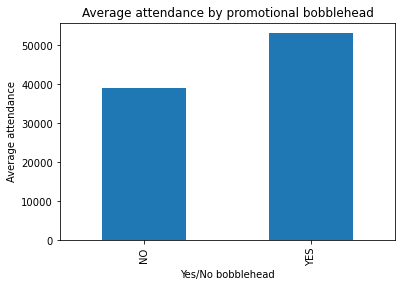

In [112]:
# Visualizing the data.
Dodgers_MLB_df.groupby(['bobblehead'])['attend'].mean().plot(kind='bar')
plt.title('Average attendance by promotional bobblehead') 
plt.xlabel('Yes/No bobblehead')
plt.ylabel('Average attendance')

We could see that, for the promotional giveaway 'bobblehead', average attendance is more compared to no 'bobblehead'. 

In [104]:
# Analyzing the data.
Dodgers_MLB_df.groupby(['day_night','day_of_week'])['attend'].describe()


count          mean           std      min       25%  \
day_night day_of_week                                                         
Day       Saturday       1.0  44217.000000           NaN  44217.0  44217.00   
          Sunday        11.0  40921.000000   7057.652443  31607.0  35680.50   
          Tuesday        1.0  56000.000000           NaN  56000.0  56000.00   
          Wednesday      2.0  38275.500000   2375.171678  36596.0  37435.75   
Night     Friday        13.0  40116.923077   4694.879400  31601.0  37133.00   
          Monday        12.0  34965.666667   7005.957949  24312.0  32553.75   
          Saturday      12.0  42977.583333   6608.493893  33735.0  38677.50   
          Sunday         2.0  49682.000000   8028.490394  44005.0  46843.50   
          Thursday       5.0  40407.400000  12411.591328  26773.0  28328.00   
          Tuesday       12.0  47053.000000   8263.141478  32799.0  42009.50   
          Wednesday     10.0  37447.100000   9574.760391  25509.0  30795.00   

                           50%       75%      max  
day_night day_of_week                              
Day       Saturday     44217.0  44217.00  44217.0  
          Sunday       39715.0  45624.00  53504.0  
          Tuesday      56000.0  56000.00  56000.0  
          Wednesday    38275.5  39115.25  39955.0  
Night     Friday       40167.0  43537.00  49763.0  
          Monday       33582.0  37162.50  50559.0  
          Saturday     41586.5  46558.75  54242.0  
          Sunday       49682.0  52520.50  55359.0  
          Thursday     43309.0  49006.00  54621.0  
          Tuesday      49107.0  53879.50  56000.0  
          Wednesday    35549.0  42663.75  53570.0

Text(0, 0.5, 'Average attendance')

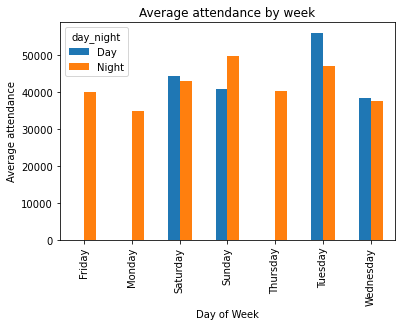

In [113]:
# Visualizing the data.
Dodgers_MLB_df.groupby(['day_of_week','day_night'])['attend'].mean().unstack().plot(kind='bar')
plt.title('Average attendance by week') 
plt.xlabel('Day of Week')
plt.ylabel('Average attendance')

From above, We could say that, people tend to attend more night games than day time, since they are not tied up to work. We could improve the attendance, If we can conduct more games on saturday,sunday day time and friday, saturday nights as weekend, is the best time available for most of the people.